## Name: - Siddhartha Seelam

## Task 3: - Exploratory Data Analysis - Retail

## To Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’


### __ Importing Libraries __

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### __ Loading Dataset & Exploring the Data __

In [2]:
#Store the dataset in a variable named 'dataset'
dataset = pd.read_csv('SampleSuperstore.csv')

In [4]:
#Let's see the first 5 rows of the data
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
#Coloumn names of the dataset
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
#copying the dataset
df = dataset.copy()

In [7]:
#Dropping unnecessary coloumns

df.drop('Country',axis='columns',inplace=True) 
df.drop('Postal Code',axis='columns',inplace=True)

In [8]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
#Shape of the data
print(df.shape)


(9994, 11)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


All the columns contain Non-Null values, out of which 3 have float data type, 2 have integer values and 8 are object.

In [11]:
#Displaying the total count of each category
pd.crosstab(index=df['Category'],columns='count')

col_0,count
Category,
Furniture,2121
Office Supplies,6026
Technology,1847


### __ Data Visualization using Seaborn __

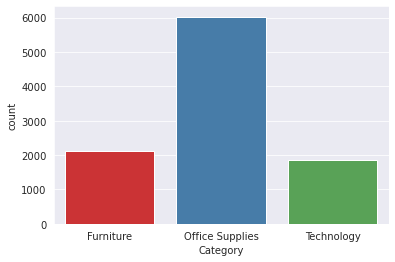

In [12]:
sns.set_style("darkgrid")
sns.countplot(x='Category',data=df,palette="Set1")

In [13]:
pd.crosstab(index=df['Sub-Category'],columns='count')

col_0,count
Sub-Category,
Accessories,775
Appliances,466
Art,796
Binders,1523
Bookcases,228
Chairs,617
Copiers,68
Envelopes,254
Fasteners,217


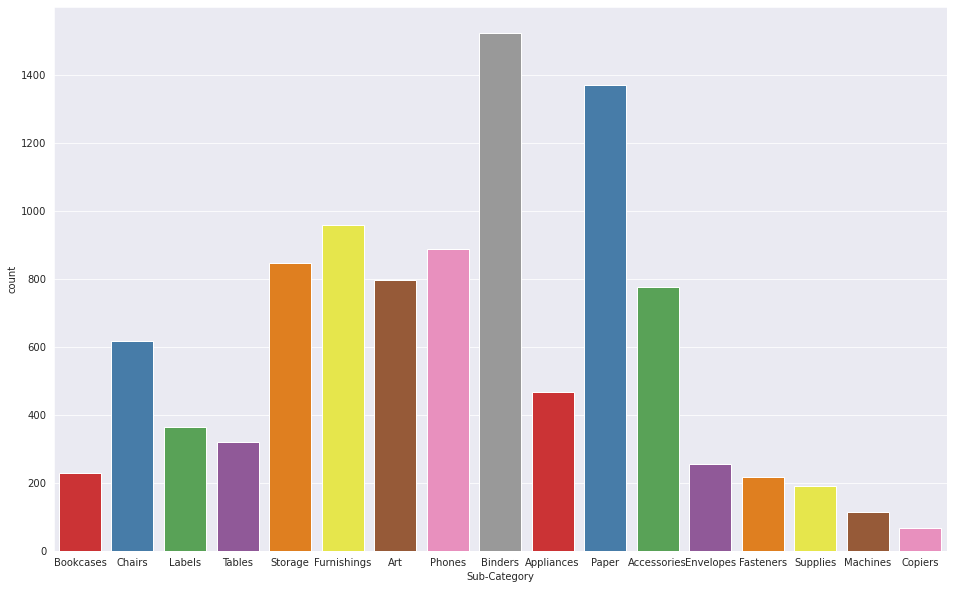

In [14]:
plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
sns.countplot(x='Sub-Category',data=df,palette='Set1')

In [15]:
pd.crosstab(index=df['Segment'],columns='count')

col_0,count
Segment,
Consumer,5191
Corporate,3020
Home Office,1783


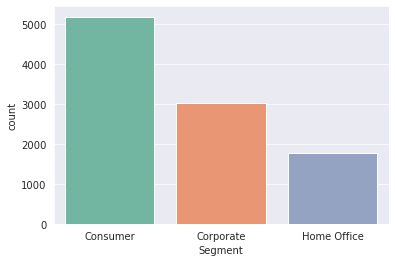

In [16]:
#displaying the total count of each segment
sns.set_style("darkgrid")
sns.countplot(x='Segment',data=df,palette="Set2")

In [17]:
pd.crosstab(index=df['Ship Mode'],columns='count')

col_0,count
Ship Mode,
First Class,1538
Same Day,543
Second Class,1945
Standard Class,5968


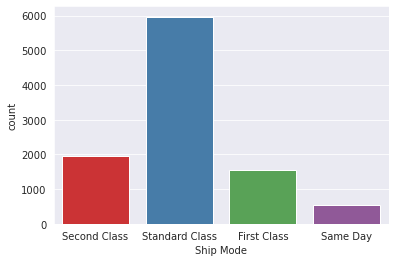

In [18]:
sns.set_style("darkgrid")
sns.countplot(x='Ship Mode',data=df,palette="Set1")

In [19]:
pd.crosstab(index=df['Region'],columns='count')

col_0,count
Region,
Central,2323
East,2848
South,1620
West,3203


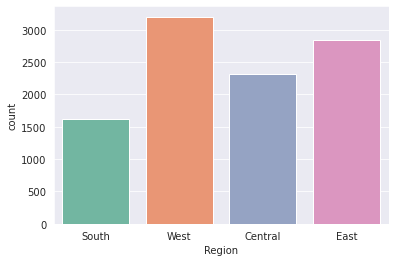

In [20]:
sns.set_style("darkgrid")
sns.countplot(x="Region",data=df,palette="Set2")

In [21]:
numerical_data =df.select_dtypes(exclude=[object])
numerical_data.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


In [22]:
#Shape of numerical data
numerical_data.shape

(9994, 4)

In [23]:
#Correlation of numerical data
corr_matrix = numerical_data.corr()
corr_matrix

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


### __ Using Correlation matrix to plot the Heatmap __

+1 tells that the variable is positively correlated with another variable, whereas -1 tells that the varible is negatively correlated with another variable.


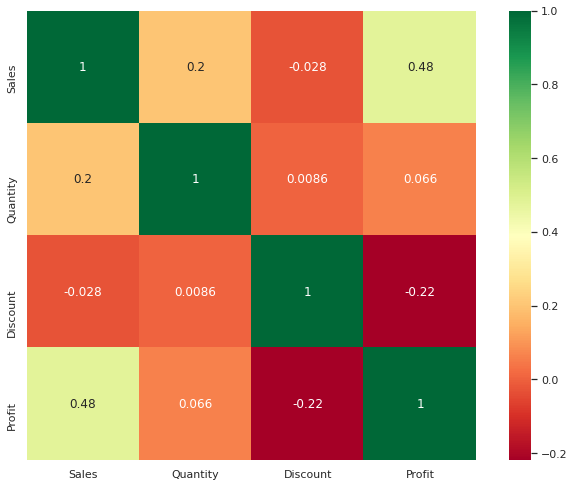

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax=sns.heatmap(corr_matrix,#vmin=-1,vmax=1,center=0,
              # cmap=sns.diverging_palette(20,220,n=200),
               cmap='RdYlGn',annot=corr_matrix,
               square = True)

print('+1 tells that the variable is positively correlated with another variable, whereas -1 tells that the varible is negatively correlated with another variable.')

In [25]:
df.Sales.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

### __ Data Visualization using seaborn __
* Dist plot
* Pie plot
* Bar plot

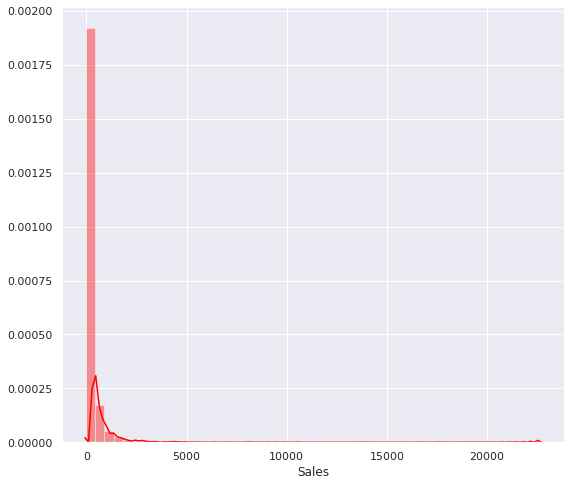

In [26]:
plt.figure(figsize= (9,8))
sns.distplot(df.Sales, color = 'red')

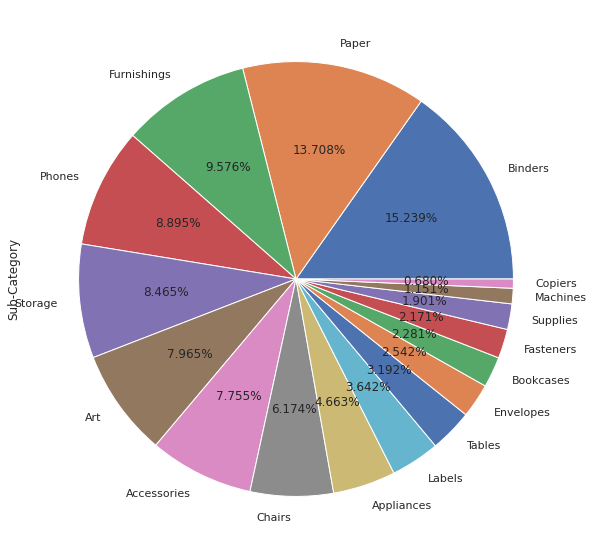

In [27]:
plt.figure(figsize=(10,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%2.3f%%")

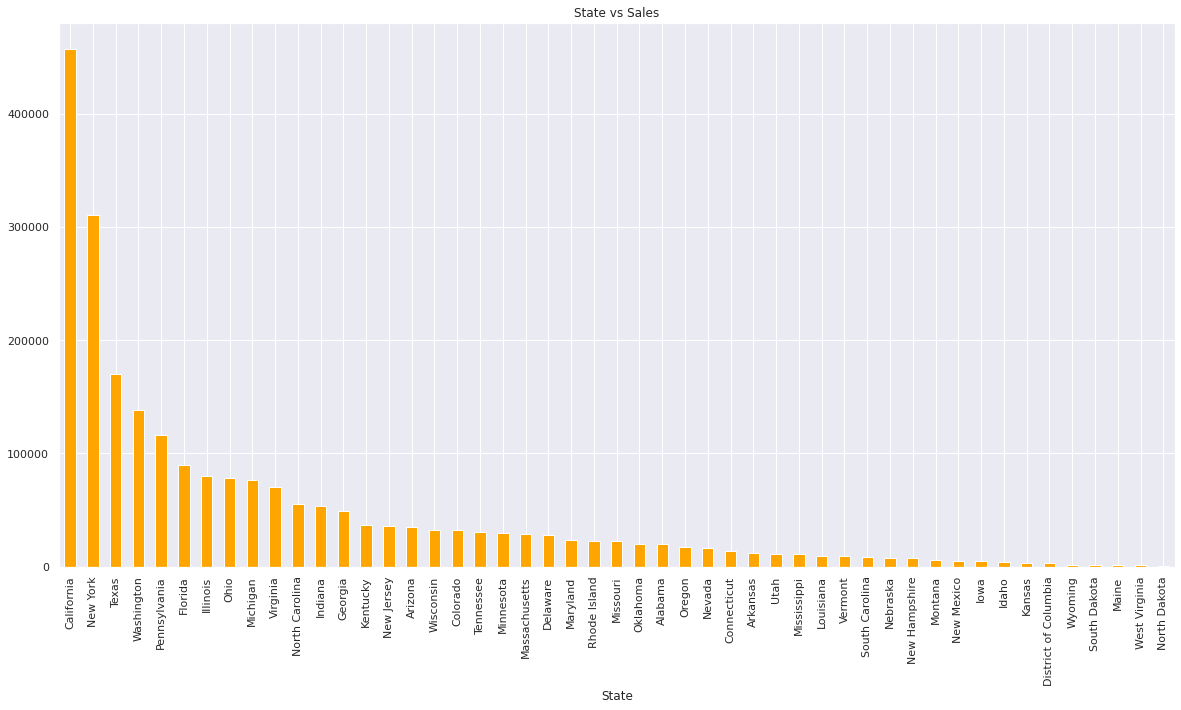

In [48]:
statewise=df.groupby(['State'])['Sales'].sum()
statewise.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(20,10))
plt.title('State vs Sales')
statewise.plot.bar(color='orange')

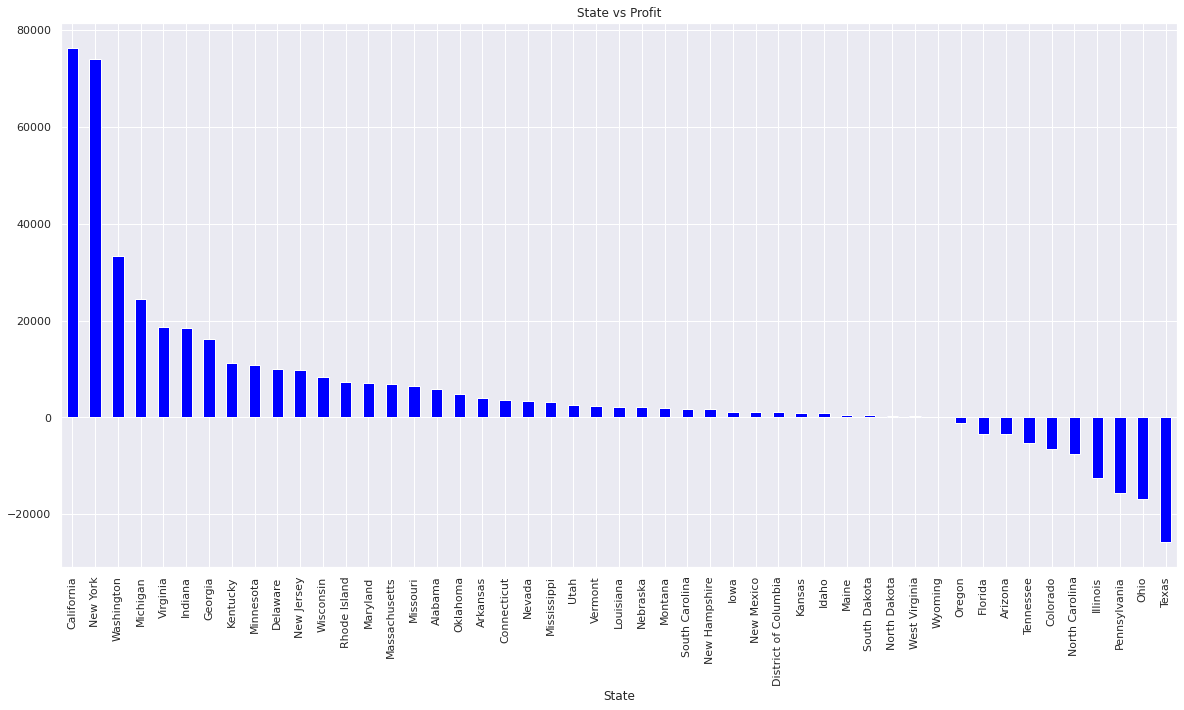

In [49]:
statewise=df.groupby(['State'])['Profit'].sum()
statewise.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(20,10))
plt.title("State vs Profit")
statewise.plot.bar(color='blue')

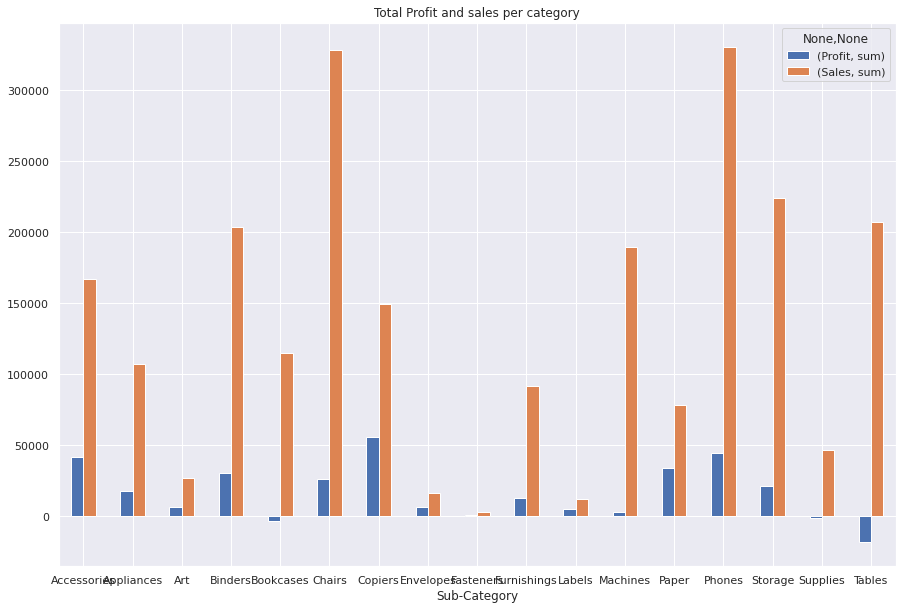

In [50]:
s=df.groupby('Sub-Category')['Profit','Sales'].agg(['sum'])
s.plot.bar(rot=0, title="Total Profit and sales per category",figsize=(15,10));
plt.show(block=True);

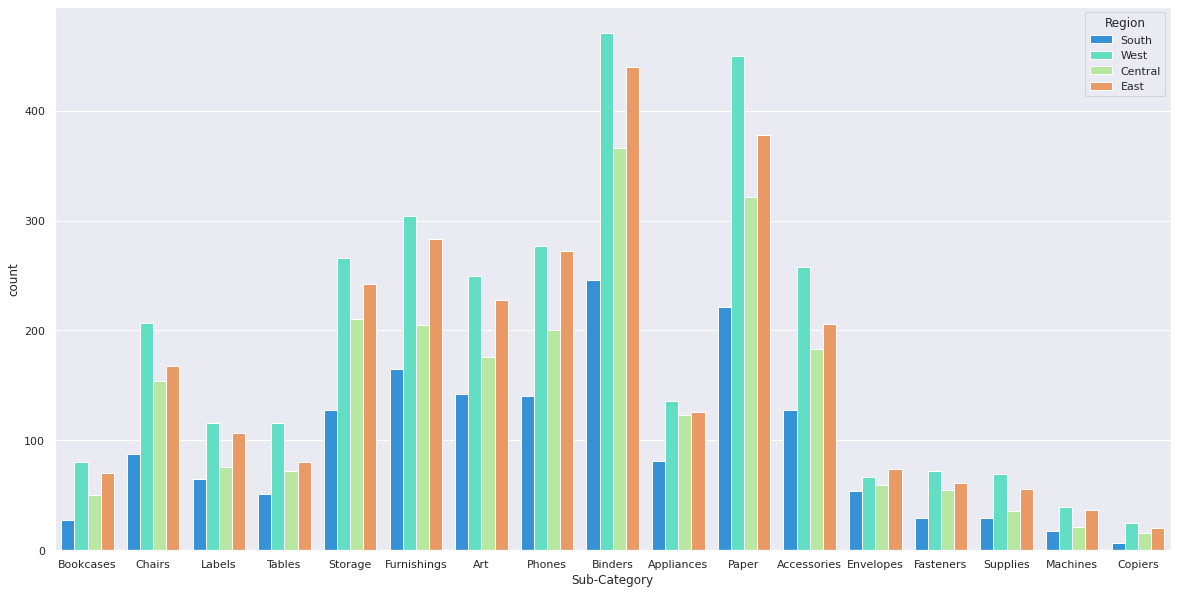

In [66]:
plt.figure(figsize=(20,10))
sns.countplot(x="Sub-Category", hue="Region", data=df,palette="rainbow",color='blue')
plt.show()

In [32]:
California_data = df.where(df.State == 'California')
California_data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.62,2.0,0.0,6.8714
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


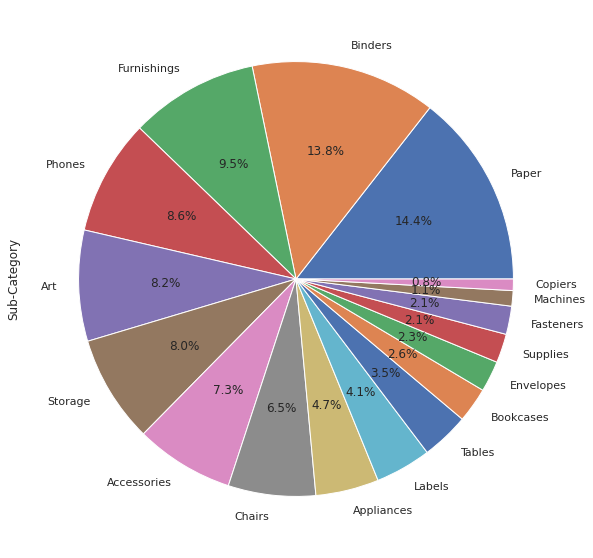

In [33]:
plt.figure(figsize=(10,10))
California_data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

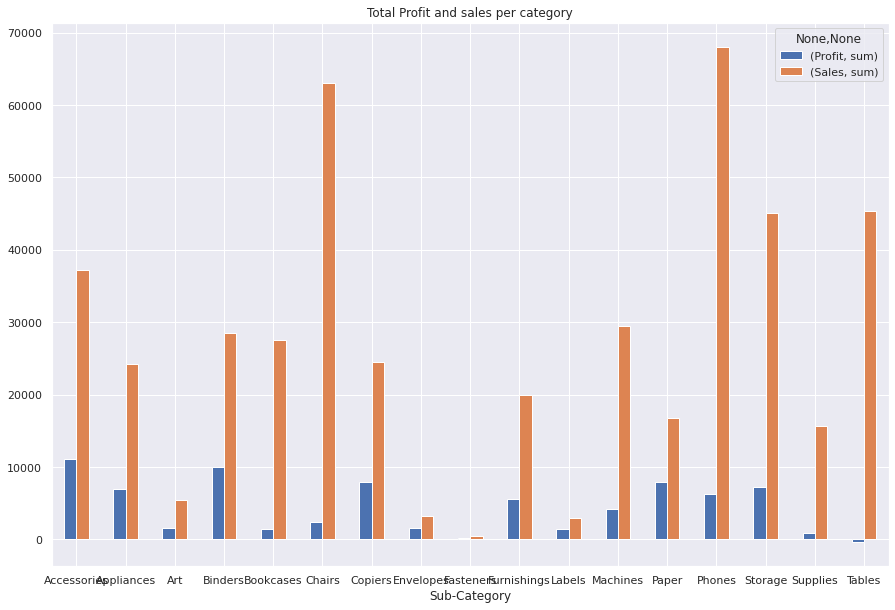

In [34]:
s=California_data.groupby('Sub-Category')['Profit','Sales'].agg(['sum'])
s.plot.bar(rot=0, title="Total Profit and sales per category",figsize=(15,10));
plt.show(block=True);

In [35]:
NY_data = df.where(df.State == 'New York')
NY_data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


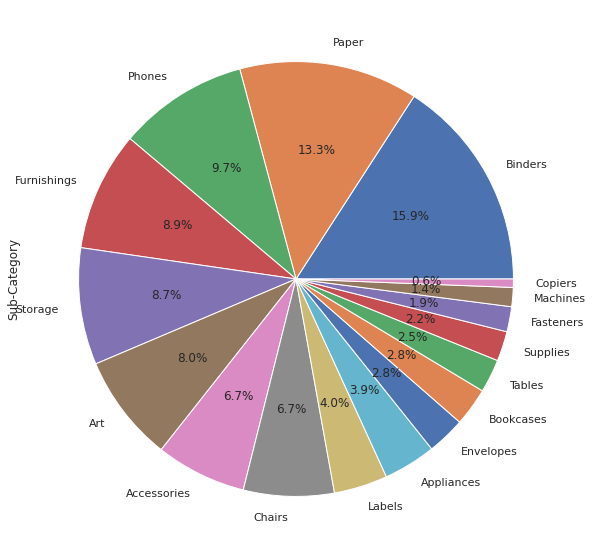

In [36]:
plt.figure(figsize=(10,10))
NY_data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

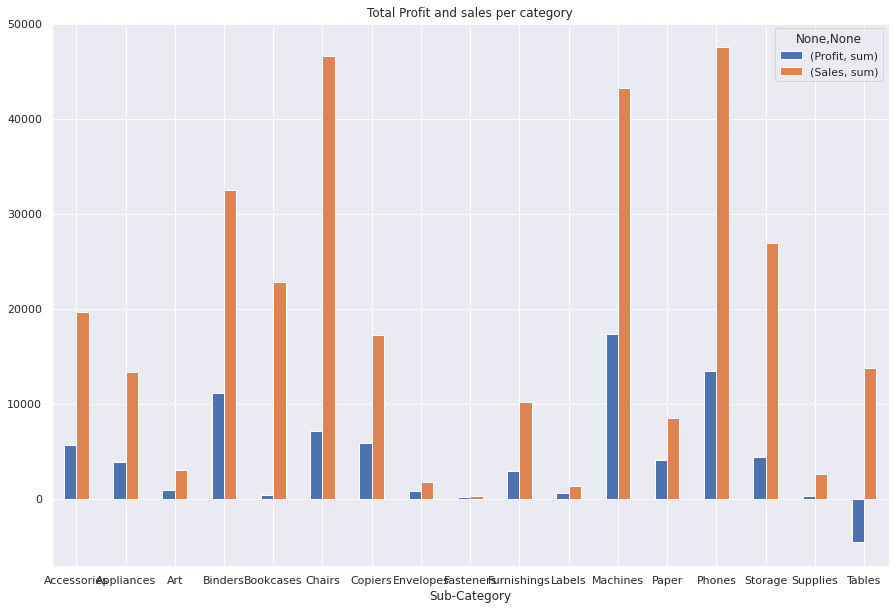

In [37]:
s=NY_data.groupby('Sub-Category')['Profit','Sales'].agg(['sum'])
s.plot.bar(rot=0, title="Total Profit and sales per category",figsize=(15,10));
plt.show(block=True);

In [38]:
Texas_data = df.where(df.State == 'Texas')
Texas_data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


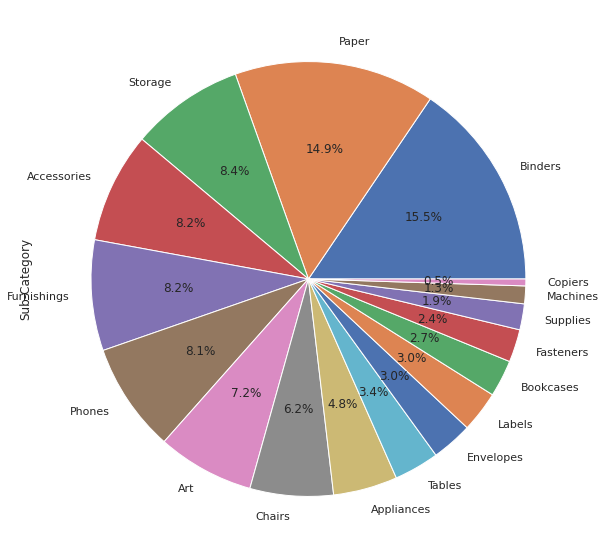

In [39]:
plt.figure(figsize=(10,10))
Texas_data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

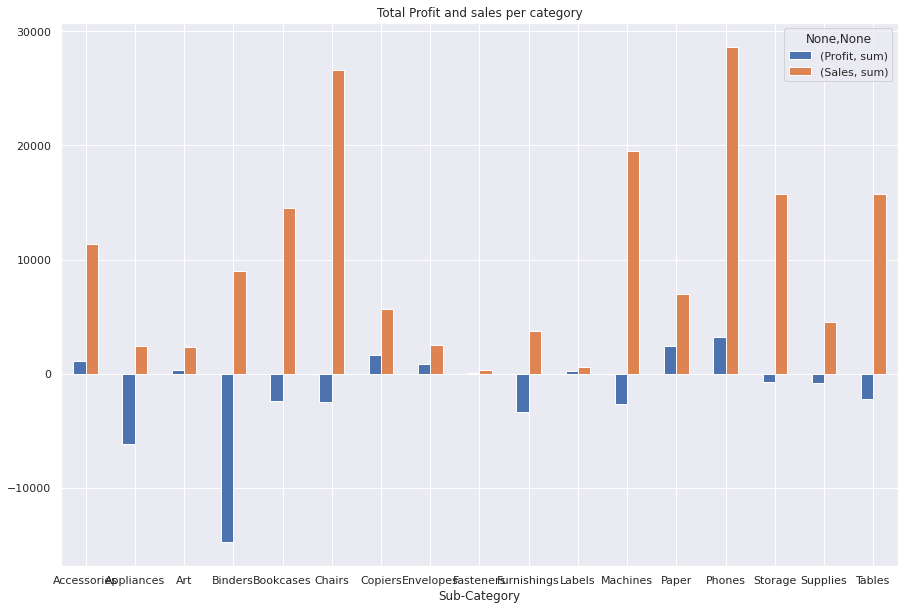

In [40]:
s=Texas_data.groupby('Sub-Category')['Profit','Sales'].agg(['sum'])
s.plot.bar(rot=0, title="Total Profit and sales per category",figsize=(15,10));
plt.show(block=True);

## As a Bussiness Manager, here is where I will focus to increase the profit.
* The correlation between Profit and sales do exist . When there is a sale there is a profit observed in the business
* When the sales starts the quantity of the prodcut also increases as the price decreases
* The discount is not much affecting the profit hence this feature should be taken care . May be the good discount may benifit the business
* The focus on the central region should be more as more loss are observed there .
* The discount is inversely proportional to the sales which has to be taken care .
* Some of the segment like consumer and home office shows loss which need to be improved by looking at the other feature like sales and discount in that area.


## Final Conclusion
* Most bought good is Binder. It is bought from people of all the regions. But Binders do not make much profit. If the cost of production of binder can be brought down then it will the store will be able to make more profit on it.
* The store should be promoting Copiers more, as less people are buying it currently. But the profit on it highest than any other good.
* Standard mode of shipment mode is used widely.
* People from Western region are buying more goods than any other reagion.
* California is the most profitable state and none of the goods are making loses in this state. Most profitable goods in this state is Accessories and Binders. Fasterns, Tables and Supplies are making least profit and sales for these goods are high also yet they are not able to make high profit. Art is making less profit but the sales for it are less so the store should try increasing sales of Art, it might make more profit.
* New York is 2nd most profitable state. Machines, Phones and Binders are the most profitable goods. Tabels are making huge losses but sales for it are high. Fastners, Supplies, Art and Bookcases are least profitable goods. Although Labels and Envolopes are make low profit but the sales for it are also less. So there is a chance that these goods will make more profit if sales of these products are increased.
* Texas is 3rd highest in sales wise comparison but has huge losses. So, by plotting data of Texas we can see that Binders are making huge losses. After that Appliances are. Most profitable good in Texas are Phones, Paper and Copiers. So these goods should be sold more rather than anyother.